# InsightEd - Data Cleaning

In [48]:
library(dplyr)
library(data.table)
library(skimr)
library(tidyverse)
library(janitor) 
library(shiny)

In [49]:
# read and load csv
data <- fread("mini_task.csv")

In [50]:
# all columns are read as factor (not chr) for accuracy
head(data)

Gender,Age,Education Level,Institution Type,IT Student,Location,Load-shedding,Financial Condition,Internet Type,Network Type,Class Duration,Self Lms,Device,Adaptivity Level
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Boy,21-25,University,Non Government,No,Yes,Low,Mid,Wifi,4G,3-6,No,Tab,Moderate
Girl,21-25,University,Non Government,No,Yes,High,Mid,Mobile Data,4G,1-3,Yes,Mobile,Moderate
Girl,16-20,College,Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Moderate
Girl,11-15,School,Non Government,No,Yes,Low,Mid,Mobile Data,4G,1-3,No,Mobile,Moderate
Girl,16-20,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,0,No,Mobile,Low
Boy,11-15,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Low


In [51]:
# Initial Exploration and Cleaning with janitor
data %>% 
  tabyl(`Adaptivity Level`)
data %>% 
  tabyl(`Financial Condition`)
data %>% 
  tabyl(`Internet Type`)
data %>% 
  tabyl(`Network Type`)
data %>% 
  tabyl(`Device`)
data %>% 
  tabyl(`Age`)
data <- data %>% 
  clean_names() # Clean column names (replace spaces with underscores, etc.)

Adaptivity Level,n,percent
<chr>,<int>,<dbl>
High,100,0.08298755
Low,480,0.39834025
Moderate,625,0.51867220


Financial Condition,n,percent
<chr>,<int>,<dbl>
Mid,878,0.72863071
Poor,242,0.20082988
Rich,85,0.07053942


Internet Type,n,percent
<chr>,<int>,<dbl>
Mobile Data,695,0.5767635
Wifi,510,0.4232365


Network Type,n,percent
<chr>,<int>,<dbl>
2G,19,0.01576763
3G,411,0.34107884
4G,775,0.64315353


Device,n,percent
<chr>,<int>,<dbl>
Computer,162,0.13443983
Mobile,1013,0.84066390
Tab,30,0.02489627


Age,n,percent
<chr>,<int>,<dbl>
1-5,81,0.06721992
11-15,353,0.29294606
16-20,278,0.23070539
21-25,374,0.31037344
26-30,68,0.05643154
6-10,51,0.04232365


In [52]:
# Age Cleaning
data <- data %>%
  mutate(age_numeric = case_when(
    age == "1-5" ~ 3,
    age == "6-10" ~ 8,
    age == "11-15" ~ 13,
    age == "16-20" ~ 18,
    age == "21-25" ~ 23,
    age == "26-30" ~ 28,
    TRUE ~ NA_integer_
  )) %>%
  select(-age)

In [53]:
# Convert to factors (crucial for Shiny and analysis)
data <- data %>%
  mutate(
    gender = as.factor(gender),
    education_level = as.factor(education_level),
    institution_type = as.factor(institution_type),
    it_student = as.factor(it_student),
    location = as.factor(location),
    load_shedding = as.factor(load_shedding),
    financial_condition = as.factor(financial_condition),
    internet_type = as.factor(internet_type),
    network_type = as.factor(network_type),
    class_duration = as.factor(class_duration),
    self_lms = as.factor(self_lms),
    device = as.factor(device),
    adaptivity_level = factor(adaptivity_level, levels = c("Low", "Moderate", "High"), ordered = TRUE)
  )

In [54]:
# check data dimensions; Check the data dimensions (number of rows and columns)
dim(data)

[1] 1205   14

In [55]:
# Check the column names to get column names
colnames(data)

[1] "gender"              "education_level"     "institution_type"   
 [4] "it_student"          "location"            "load_shedding"      
 [7] "financial_condition" "internet_type"       "network_type"       
[10] "class_duration"      "self_lms"            "device"             
[13] "adaptivity_level"    "age_numeric"

In [56]:
# Check the bottom of data to see the last observations
tail(data)

gender,education_level,institution_type,it_student,location,load_shedding,financial_condition,internet_type,network_type,class_duration,self_lms,device,adaptivity_level,age_numeric
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<ord>,<dbl>
Boy,University,Non Government,Yes,Yes,Low,Mid,Wifi,4G,3-6,No,Computer,Low,23
Girl,College,Non Government,No,Yes,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,18
Girl,College,Non Government,No,No,High,Mid,Wifi,4G,3-6,No,Mobile,Moderate,18
Boy,School,Non Government,No,Yes,Low,Mid,Mobile Data,3G,1-3,No,Mobile,Moderate,13
Girl,College,Non Government,No,No,Low,Mid,Wifi,4G,1-3,No,Mobile,Low,18
Girl,School,Non Government,No,Yes,Low,Poor,Mobile Data,3G,1-3,No,Mobile,Moderate,13


In [57]:
# Check for missing values in each column
colSums(is.na(data))

gender     education_level    institution_type          it_student 
                  0                   0                   0                   0 
           location       load_shedding financial_condition       internet_type 
                  0                   0                   0                   0 
       network_type      class_duration            self_lms              device 
                  0                   0                   0                   0 
   adaptivity_level         age_numeric 
                  0                   0

In [58]:
duplicates <- duplicated(data)
sum(duplicates)

[1] 949

In [59]:
# Create a new data frame without any duplicate rows
data <- unique(data)

In [60]:
# count remaining rows
num_unique_rows <- nrow(df)
print(num_unique_rows)

NULL


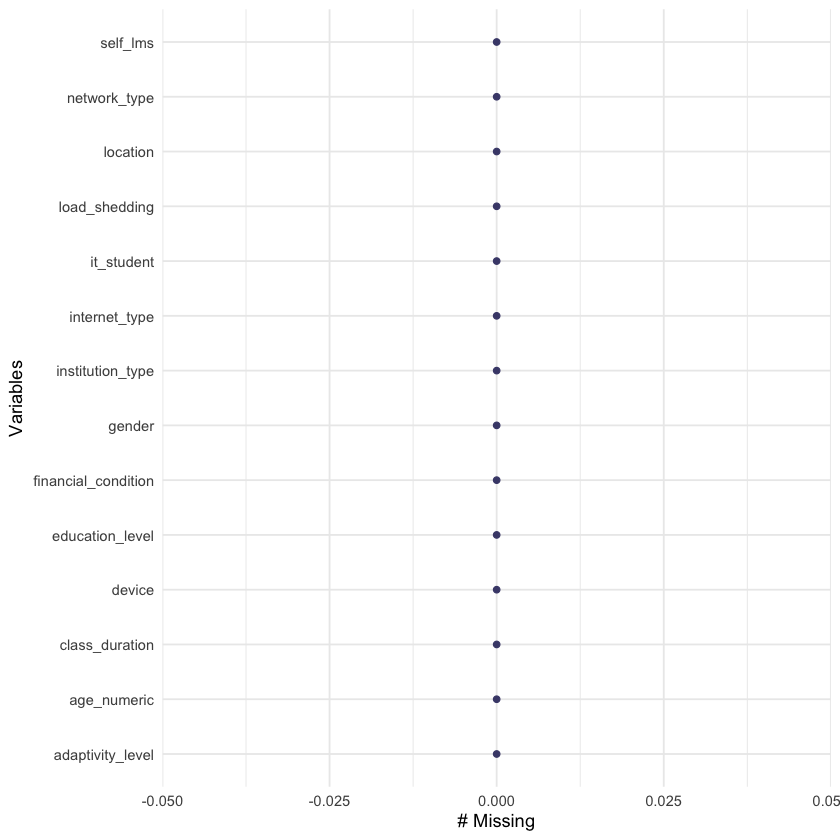

In [61]:
naniar::gg_miss_var(data)  # Missing variables

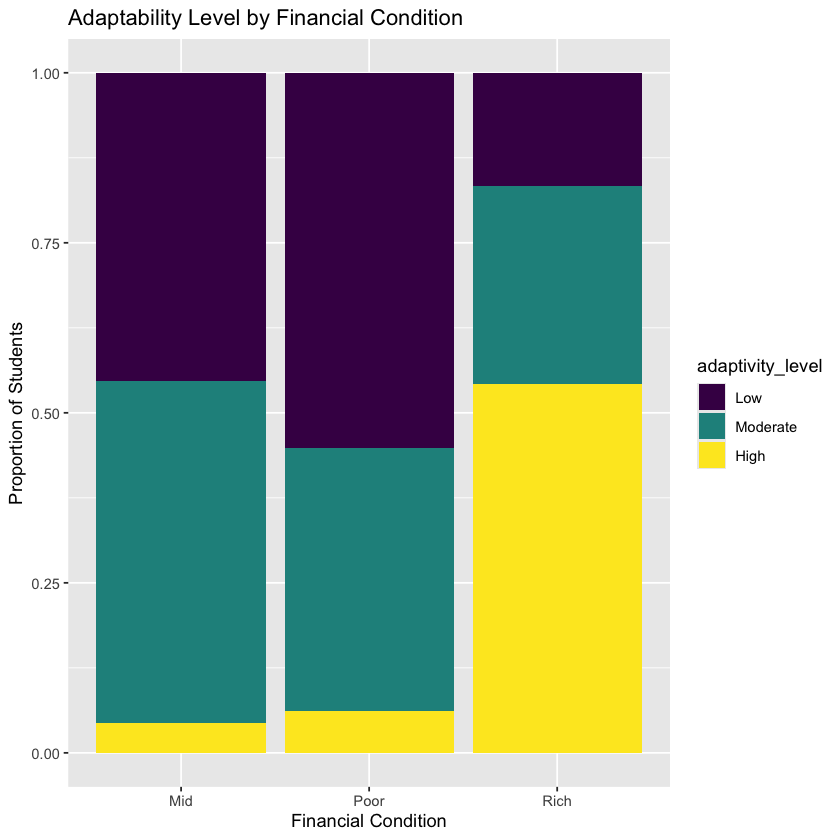

In [62]:
# EDA for Equity Analysis
# Example: Adaptability vs. Financial Condition
data %>%
  ggplot(aes(x = financial_condition, fill = adaptivity_level)) +
  geom_bar(position = "fill") +
  labs(title = "Adaptability Level by Financial Condition",
       x = "Financial Condition",
       y = "Proportion of Students")


In [63]:
write.csv(data, "cleaned_data.csv")

In [64]:
str(data)

Classes ‘data.table’ and 'data.frame':	256 obs. of  14 variables:
 $ gender             : Factor w/ 2 levels "Boy","Girl": 1 2 2 2 2 1 1 1 1 1 ...
 $ education_level    : Factor w/ 3 levels "College","School",..: 3 3 1 2 2 2 2 2 1 2 ...
 $ institution_type   : Factor w/ 2 levels "Government","Non Government": 2 2 1 2 2 2 2 2 1 2 ...
 $ it_student         : Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ location           : Factor w/ 2 levels "No","Yes": 2 2 2 2 2 2 2 2 2 2 ...
 $ load_shedding      : Factor w/ 2 levels "High","Low": 2 1 2 2 2 2 2 2 2 2 ...
 $ financial_condition: Factor w/ 3 levels "Mid","Poor","Rich": 1 1 1 1 2 2 1 1 1 1 ...
 $ internet_type      : Factor w/ 2 levels "Mobile Data",..: 2 1 2 1 1 1 2 2 2 1 ...
 $ network_type       : Factor w/ 3 levels "2G","3G","4G": 3 3 3 3 2 2 3 3 3 2 ...
 $ class_duration     : Factor w/ 3 levels "0","1-3","3-6": 3 2 2 2 1 2 1 2 2 2 ...
 $ self_lms           : Factor w/ 2 levels "No","Yes": 1 2 1 1 1 1 1 1 1 1 ...
 $ devi

In [65]:
dim(data)

[1] 256  14

In [69]:
# Outliers detection using Z-scores
values <- data$age_numeric
mean_value <- mean(values, na.rm = TRUE)
sd_value <- sd(values, na.rm = TRUE)
z_scores <- (values - mean_value) / sd_value
outliers <- values[abs(z_scores) > 3]
print(outliers)

numeric(0)
